# Data Exploration & Preprocessing

Mục tiêu:
- Đọc dữ liệu World Bank đã tổng hợp (2000–2024)
- Khám phá, làm sạch, và chuẩn hóa dữ liệu
- Chia dữ liệu thành train/test để phục vụ các mô hình Machine Learning

Nguồn dữ liệu: `data/worldbank_2000_2024.csv`

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
print("ĐỌC DỮ LIỆU")
# Đọc dữ liệu
df = pd.read_csv("../data/worldbank_2000_2024.csv")

# Xem kích thước & vài dòng đầu
print("Kích thước dữ liệu:", df.shape)
df.head()

ĐỌC DỮ LIỆU
Kích thước dữ liệu: (5425, 15)


,Country Name,Country Code,Year,"Population, total",Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population),Population growth (annual %),"Life expectancy at birth, total (years)",GDP per capita (current US$),GDP growth (annual %),People using safely managed sanitation services (% of population),Access to electricity (% of population),People using at least basic drinking water services (% of population),Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),Population living in slums (% of urban population),"Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)"
0,Aruba,ABW,2000,90588.0,NaN,1.030817,72.939,20681.023027,7.622921,NaN,91.7,94.488806,2.965073,0.0,NaN
1,Aruba,ABW,2001,91439.0,NaN,0.935033,73.044,20740.132583,4.182002,NaN,100.0,94.770491,2.969193,NaN,NaN
2,Aruba,ABW,2002,92074.0,NaN,0.692052,73.135,21307.248251,-0.944953,NaN,100.0,95.052176,3.221322,0.0,NaN
3,Aruba,ABW,2003,93128.0,NaN,1.138229,73.236,21949.485996,1.110505,NaN,100.0,95.333861,3.671291,NaN,NaN
4,Aruba,ABW,2004,95138.0,NaN,2.135358,73.223,23700.631990,7.293728,NaN,100.0,95.615545,3.667304,0.0,NaN


## Thông tin tổng quan về dữ liệu
Kiểm tra kiểu dữ liệu, số lượng giá trị null, và thống kê mô tả cơ bản.


In [3]:
print("THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU")

print("\nCÁC CỘT TRONG DỮ LIỆU VÀ Ý NGHĨA:")
print("1. Country Name: Tên quốc gia")
print("2. Country Code: Mã quốc gia")
print("3. Year: Năm")
print("4. Population, total: Tổng dân số")
print("5. Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population): Tỷ lệ nghèo với chuẩn $3.00/ngày (% dân số)")
print("6. Population growth (annual %): Tăng trưởng dân số hàng năm (%)")
print("7. Life expectancy at birth, total (years): Tuổi thọ trung bình (năm)")
print("8. GDP per capita (current US$): GDP bình quân đầu người (USD hiện tại)")
print("9. GDP growth (annual %): Tăng trưởng GDP hàng năm (%)")
print("10. People using safely managed sanitation services (% of population): Tỷ lệ dân số sử dụng dịch vụ vệ sinh an toàn (%)")
print("11. Access to electricity (% of population): Tỷ lệ dân số được tiếp cận điện (%)")
print("12. People using at least basic drinking water services (% of population): Tỷ lệ dân số sử dụng nước uống cơ bản (%)")
print("13. Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita): Lượng khí thải CO2 bình quân đầu người (tấn)")
print("14. Population living in slums (% of urban population): Tỷ lệ dân số sống trong khu ổ chuột (% dân số đô thị)")
print("15. Labor force participation rate, total (% of total population ages 15+): Tỷ lệ tham gia lực lượng lao động (% dân số từ 15 tuổi trở lên)")

print("\n" + "="*50)
print("THÔNG TIN DỮ LIỆU:")
df.info()

THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU

CÁC CỘT TRONG DỮ LIỆU VÀ Ý NGHĨA:
1. Country Name: Tên quốc gia
2. Country Code: Mã quốc gia
3. Year: Năm
4. Population, total: Tổng dân số
5. Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population): Tỷ lệ nghèo với chuẩn $3.00/ngày (% dân số)
6. Population growth (annual %): Tăng trưởng dân số hàng năm (%)
7. Life expectancy at birth, total (years): Tuổi thọ trung bình (năm)
8. GDP per capita (current US$): GDP bình quân đầu người (USD hiện tại)
9. GDP growth (annual %): Tăng trưởng GDP hàng năm (%)
10. People using safely managed sanitation services (% of population): Tỷ lệ dân số sử dụng dịch vụ vệ sinh an toàn (%)
11. Access to electricity (% of population): Tỷ lệ dân số được tiếp cận điện (%)
12. People using at least basic drinking water services (% of population): Tỷ lệ dân số sử dụng nước uống cơ bản (%)
13. Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita): Lượng khí thải CO2 bình quân đầu người (tấn)
14. Pop

## Giá trị thiếu (Missing Values)

In [4]:
print("GIÁ TRỊ THIẾU TRONG DỮ LIỆU:")
missing_values = df.isnull().sum()
print(missing_values)

GIÁ TRỊ THIẾU TRONG DỮ LIỆU:
Country Name                                                                                        0
Country Code                                                                                        0
Year                                                                                                0
Population, total                                                                                   0
Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)                              3591
Population growth (annual %)                                                                        1
Life expectancy at birth, total (years)                                                           217
GDP per capita (current US$)                                                                      212
GDP growth (annual %)                                                                             284
People using safely managed sanitation services (% of

## Thống kê mô tả dữ liệu số


In [5]:
print("TỔNG QUAN VỀ DỮ LIỆU DẠNG SỐ")
df.describe()

TỔNG QUAN VỀ DỮ LIỆU DẠNG SỐ


,Year,"Population, total",Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population),Population growth (annual %),"Life expectancy at birth, total (years)",GDP per capita (current US$),GDP growth (annual %),People using safely managed sanitation services (% of population),Access to electricity (% of population),People using at least basic drinking water services (% of population),Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),Population living in slums (% of urban population),"Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)"
count,5425.000000,5.425000e+03,1834.000000,5424.000000,5208.000000,5213.000000,5141.000000,3117.000000,5135.000000,4777.000000,4872.000000,2015.000000,4666.000000
mean,2012.000000,3.294140e+07,9.410087,1.287950,70.894940,16144.767776,3.359559,54.227621,81.521480,86.329314,4.880452,28.021719,60.895221
std,7.211767,1.305947e+08,17.126240,1.610207,8.790103,24935.671613,5.976554,30.874181,28.804747,17.893755,8.872455,27.319118,10.922945
min,2000.000000,9.544000e+03,0.000000,-11.356645,14.665000,109.593814,-54.336106,0.000000,0.800000,18.682303,0.000000,0.000000,23.091000
25%,2006.000000,7.281470e+05,0.200000,0.312292,65.421750,1570.104400,1.213024,26.193412,70.150000,79.884430,0.576124,1.250000,54.598750
50%,2012.000000,5.773493e+06,1.400000,1.184047,72.603000,5477.037124,3.508283,51.809042,99.100000,95.025335,2.284135,19.566240,61.254500
75%,2018.000000,2.106840e+07,9.400000,2.219828,77.465854,20985.011216,5.821121,84.735635,100.000000,99.375281,6.203487,51.938240,67.034750
max,2024.000000,1.450936e+09,94.900000,21.700343,86.372000,256580.515123,91.137039,100.000000,100.000000,100.000000,202.865184,99.805840,88.349000


## Phân tích giá trị của các cột

In [6]:
print("PHÂN TÍCH GIÁ TRỊ CỦA CÁC CỘT")

print("\nSố lượng quốc gia trong dataset:")
print(f"Số quốc gia duy nhất: {df['Country Name'].nunique()}")

print("\nPhân bố năm trong dataset:")
print(df['Year'].value_counts().sort_index())

print("\nPhân bố mã quốc gia:")
print(f"Số mã quốc gia duy nhất: {df['Country Code'].nunique()}")

PHÂN TÍCH GIÁ TRỊ CỦA CÁC CỘT

Số lượng quốc gia trong dataset:
Số quốc gia duy nhất: 217

Phân bố năm trong dataset:
Year
2000    217
2001    217
2002    217
2003    217
2004    217
2005    217
2006    217
2007    217
2008    217
2009    217
2010    217
2011    217
2012    217
2013    217
2014    217
2015    217
2016    217
2017    217
2018    217
2019    217
2020    217
2021    217
2022    217
2023    217
2024    217
Name: count, dtype: int64

Phân bố mã quốc gia:
Số mã quốc gia duy nhất: 217


## Phát hiện và xử lý dữ liệu trùng lặp

In [7]:
print("KIỂM TRA VÀ XỬ LÝ DỮ LIỆU TRÙNG LẶP")

print(f"Số hàng trùng lặp: {df.duplicated().sum()}")

def remove_duplicates(dataframe):
    """Hàm loại bỏ các hàng trùng lặp"""
    initial_shape = dataframe.shape[0]
    dataframe_cleaned = dataframe.drop_duplicates()
    final_shape = dataframe_cleaned.shape[0]
    removed_count = initial_shape - final_shape
    print(f"Đã loại bỏ {removed_count} hàng trùng lặp")
    return dataframe_cleaned

# Áp dụng hàm loại bỏ trùng lặp
df = remove_duplicates(df)
print(f"Kích thước dữ liệu sau khi loại bỏ trùng lặp: {df.shape}")

KIỂM TRA VÀ XỬ LÝ DỮ LIỆU TRÙNG LẶP
Số hàng trùng lặp: 0
Đã loại bỏ 0 hàng trùng lặp
Kích thước dữ liệu sau khi loại bỏ trùng lặp: (5425, 15)


## Phân tích outlier bằng biểu đồ boxplot

PHÂN TÍCH OUTLIER BẰNG BOXPLOT
Các cột số để phân tích: ['Population, total', 'Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)', 'Population growth (annual %)', 'Life expectancy at birth, total (years)', 'GDP per capita (current US$)', 'GDP growth (annual %)', 'People using safely managed sanitation services (% of population)', 'Access to electricity (% of population)', 'People using at least basic drinking water services (% of population)', 'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)', 'Population living in slums (% of urban population)', 'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)']


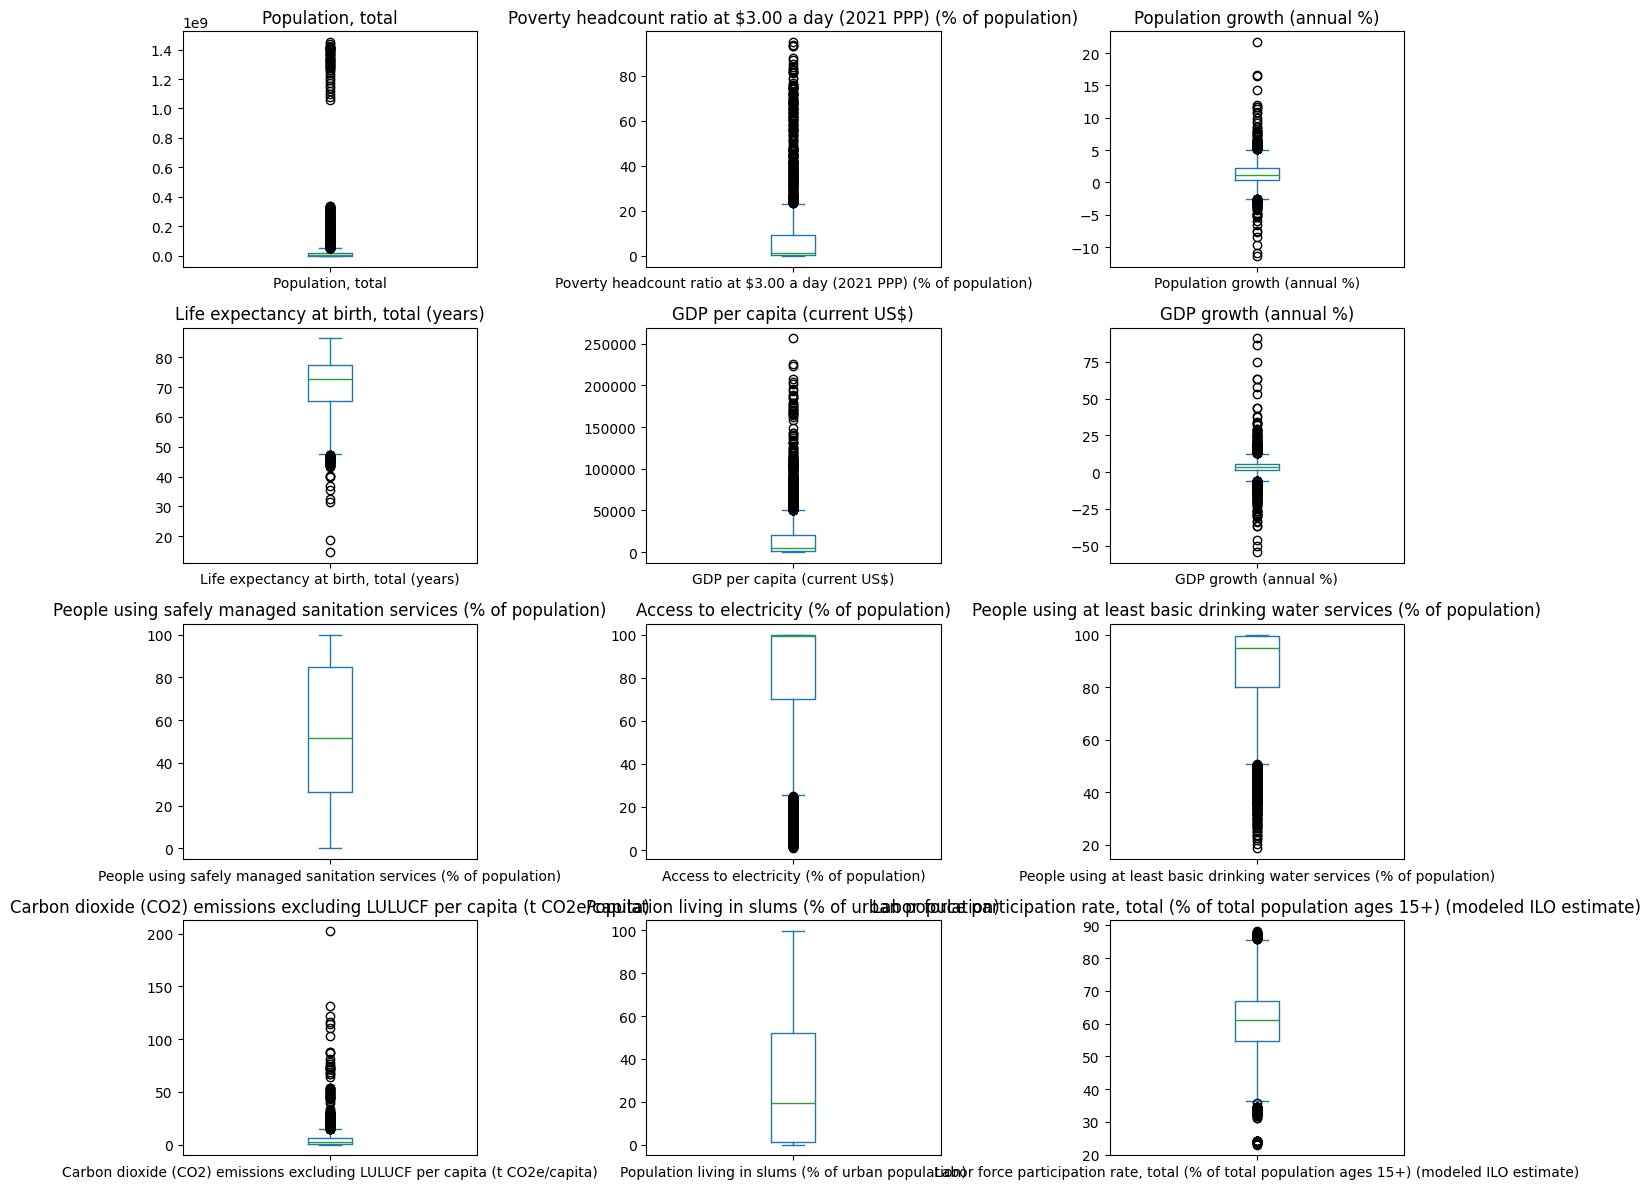


PHÂN TÍCH SỐ LƯỢNG OUTLIER:
Population, total: 623 outliers
Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population): 240 outliers
Population growth (annual %): 131 outliers
Life expectancy at birth, total (years): 54 outliers
GDP per capita (current US$): 428 outliers
GDP growth (annual %): 344 outliers
People using safely managed sanitation services (% of population): 0 outliers
Access to electricity (% of population): 454 outliers
People using at least basic drinking water services (% of population): 335 outliers
Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita): 332 outliers
Population living in slums (% of urban population): 0 outliers
Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate): 134 outliers


In [8]:
print("PHÂN TÍCH OUTLIER BẰNG BOXPLOT")

# Chọn các cột số để phân tích
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
# Loại bỏ cột Year vì không cần chuẩn hóa
if 'Year' in numeric_columns:
    numeric_columns.remove('Year')

print(f"Các cột số để phân tích: {numeric_columns}")

# Vẽ boxplot cho từng thuộc tính
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_columns):
    if i < len(axes):
        df[col].dropna().plot(kind='box', ax=axes[i], title=col)
        axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

# Phân tích số lượng outlier
print("\nPHÂN TÍCH SỐ LƯỢNG OUTLIER:")
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"{col}: {len(outliers)} outliers")

## Chuẩn hóa dữ liệu
Phân loại và chuẩn hóa các thuộc tính theo 3 phương pháp:
- Log + StandardScaler: Cho thuộc tính nhiều outlier
- MinMaxScaler: Cho thuộc tính tỷ lệ %
- StandardScaler: Cho các thuộc tính còn lại

In [11]:
print("CHUẨN HÓA DỮ LIỆU")

# Phân loại các thuộc tính
percentage_columns = [
    'Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)',
    'Population growth (annual %)',
    'People using safely managed sanitation services (% of population)',
    'Access to electricity (% of population)',
    'People using at least basic drinking water services (% of population)',
    'Population living in slums (% of urban population)',
    'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
    'GDP growth (annual %)'
]

outlier_columns = [
    'GDP per capita (current US$)',
    'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)'
]

standard_columns = [
    'Population, total',
    'Life expectancy at birth, total (years)'
]

print("Các cột tỷ lệ % (MinMaxScaler):", percentage_columns)
print("Các cột nhiều outlier (Log + StandardScaler):", outlier_columns)
print("Các cột chuẩn hóa thông thường (StandardScaler):", standard_columns)

# Tạo bản sao để chuẩn hóa
df_scaled = df.copy()

# Chuẩn hóa các cột tỷ lệ % với MinMaxScaler
print("\nCHUẨN HÓA CÁC CỘT TỶ LỆ % VỚIN MINMAXSCALER:")
minmax_scaler = MinMaxScaler()
for col in percentage_columns:
    if col in df_scaled.columns:
        non_null_mask = df_scaled[col].notna()
        if non_null_mask.any():
            df_scaled.loc[non_null_mask, f'{col}_scaled'] = minmax_scaler.fit_transform(
                df_scaled.loc[non_null_mask, [col]]
            )
            print(f"Đã chuẩn hóa: {col}")

# Chuẩn hóa các cột nhiều outlier với Log + StandardScaler
print("\nCHUẨN HÓA CÁC CỘT NHIỀU OUTLIER VỚI LOG + STANDARDSCALER:")
standard_scaler = StandardScaler()
for col in outlier_columns:
    if col in df_scaled.columns:
        non_null_mask = df_scaled[col].notna()
        if non_null_mask.any():
            # Áp dụng log transformation trước
            log_transformed = np.log1p(df_scaled.loc[non_null_mask, col])
            # Chuẩn hóa với StandardScaler
            df_scaled.loc[non_null_mask, f'{col}_scaled'] = standard_scaler.fit_transform(
                log_transformed.values.reshape(-1, 1)
            )
            print(f"Đã chuẩn hóa: {col} (Log + StandardScaler)")

# Chuẩn hóa các cột còn lại với StandardScaler
print("\nCHUẨN HÓA CÁC CỘT CÒN LẠI VỚI STANDARDSCALER:")
for col in standard_columns:
    if col in df_scaled.columns:
        non_null_mask = df_scaled[col].notna()
        if non_null_mask.any():
            df_scaled.loc[non_null_mask, f'{col}_scaled'] = standard_scaler.fit_transform(
                df_scaled.loc[non_null_mask, [col]]
            )
            print(f"Đã chuẩn hóa: {col}")

print(f"\nKích thước dữ liệu sau chuẩn hóa: {df_scaled.shape}")
print("5 dòng đầu sau chuẩn hóa:")
df_scaled.head()

CHUẨN HÓA DỮ LIỆU
Các cột tỷ lệ % (MinMaxScaler): ['Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)', 'Population growth (annual %)', 'People using safely managed sanitation services (% of population)', 'Access to electricity (% of population)', 'People using at least basic drinking water services (% of population)', 'Population living in slums (% of urban population)', 'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)', 'GDP growth (annual %)']
Các cột nhiều outlier (Log + StandardScaler): ['GDP per capita (current US$)', 'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)']
Các cột chuẩn hóa thông thường (StandardScaler): ['Population, total', 'Life expectancy at birth, total (years)']

CHUẨN HÓA CÁC CỘT TỶ LỆ % VỚIN MINMAXSCALER:
Đã chuẩn hóa: Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)
Đã chuẩn hóa: Population growth (annual %)
Đã chuẩn hóa: People using safely managed s

,Country Name,Country Code,Year,"Population, total",Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population),Population growth (annual %),"Life expectancy at birth, total (years)",GDP per capita (current US$),GDP growth (annual %),People using safely managed sanitation services (% of population),...,People using safely managed sanitation services (% of population)_scaled,Access to electricity (% of population)_scaled,People using at least basic drinking water services (% of population)_scaled,Population living in slums (% of urban population)_scaled,"Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)_scaled",GDP growth (annual %)_scaled,GDP per capita (current US$)_scaled,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)_scaled,"Population, total_scaled","Life expectancy at birth, total (years)_scaled"
0,Aruba,ABW,2000,90588.0,NaN,1.030817,72.939,20681.023027,7.622921,NaN,...,NaN,0.916331,0.932226,0.0,NaN,0.425914,0.827106,0.114633,-0.251571,0.232563
1,Aruba,ABW,2001,91439.0,NaN,0.935033,73.044,20740.132583,4.182002,NaN,...,NaN,1.000000,0.935690,NaN,NaN,0.402261,0.828910,0.115744,-0.251564,0.244510
2,Aruba,ABW,2002,92074.0,NaN,0.692052,73.135,21307.248251,-0.944953,NaN,...,NaN,1.000000,0.939154,0.0,NaN,0.367017,0.845958,0.181571,-0.251560,0.254863
3,Aruba,ABW,2003,93128.0,NaN,1.138229,73.236,21949.485996,1.110505,NaN,...,NaN,1.000000,0.942618,NaN,NaN,0.381147,0.864726,0.289835,-0.251552,0.266355
4,Aruba,ABW,2004,95138.0,NaN,2.135358,73.223,23700.631990,7.293728,NaN,...,NaN,1.000000,0.946082,0.0,NaN,0.423651,0.913234,0.288922,-0.251536,0.264876


## Chia dữ liệu thành tập train và test (90-10)

In [16]:
print("CHIA DỮ LIỆU THÀNH TẬP TRAIN VÀ TEST (90-10)")

# Chuẩn bị features (X) và target (y)
# Giả sử chúng ta muốn dự đoán GDP per capita dựa trên các biến khác
target_column = 'GDP per capita (current US$)_scaled'

# Lấy tất cả các cột đã được chuẩn hóa làm features
feature_columns = [col for col in df_scaled.columns if col.endswith('_scaled') and col != target_column]

print(f"Số lượng features: {len(feature_columns)}")
print("Các features:", feature_columns)

# Loại bỏ các hàng có missing values trong target
df_clean = df_scaled.dropna(subset=[target_column])

print(f"Kích thước dữ liệu sau khi làm sạch: {df_clean.shape}")

# Chia dữ liệu thành train và test (90-10)
X = df_clean[feature_columns]
y = df_clean[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, shuffle=True
)

print(f"\nKÍCH THƯỚC CÁC TẬP DỮ LIỆU:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

print(f"\nTỶ LỆ CHIA DỮ LIỆU:")
print(f"Train: {len(X_train)/len(df_clean)*100:.1f}%")
print(f"Test: {len(X_test)/len(df_clean)*100:.1f}%")

CHIA DỮ LIỆU THÀNH TẬP TRAIN VÀ TEST (90-10)
Số lượng features: 11
Các features: ['Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)_scaled', 'Population growth (annual %)_scaled', 'People using safely managed sanitation services (% of population)_scaled', 'Access to electricity (% of population)_scaled', 'People using at least basic drinking water services (% of population)_scaled', 'Population living in slums (% of urban population)_scaled', 'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)_scaled', 'GDP growth (annual %)_scaled', 'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)_scaled', 'Population, total_scaled', 'Life expectancy at birth, total (years)_scaled']
Kích thước dữ liệu sau khi làm sạch: (5213, 27)

KÍCH THƯỚC CÁC TẬP DỮ LIỆU:
X_train: (4691, 11)
X_test: (522, 11)
y_train: (4691,)
y_test: (522,)

TỶ LỆ CHIA DỮ LIỆU:
Train: 90.0%
Test: 10.0%


## Hiển thị dữ liệu sau khi tiền xử lý

In [17]:
print("DỮ LIỆU SAU KHI TIỀN XỬ LÝ")

print("\nTẬP TRAIN - 5 DÒNG ĐẦU:")
print(X_train.head())

print("\nTHÔNG TIN TẬP TRAIN:")
print(X_train.info())

print("\nTHỐNG KÊ MÔ TẢ TẬP TRAIN:")
print(X_train.describe())

print("\nTẬP TEST - 5 DÒNG ĐẦU:")
print(X_test.head())

DỮ LIỆU SAU KHI TIỀN XỬ LÝ

TẬP TRAIN - 5 DÒNG ĐẦU:
      Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)_scaled  \
3363                                                NaN                            
2109                                           0.010537                            
435                                            0.264489                            
4835                                                NaN                            
3219                                                NaN                            

      Population growth (annual %)_scaled  \
3363                             0.430989   
2109                             0.340370   
435                              0.370063   
4835                             0.416648   
3219                             0.434849   

      People using safely managed sanitation services (% of population)_scaled  \
3363                                                NaN                          
2109    

## Kiểm tra phân phối của target variable

KIỂM TRA PHÂN PHỐI CỦA TARGET VARIABLE


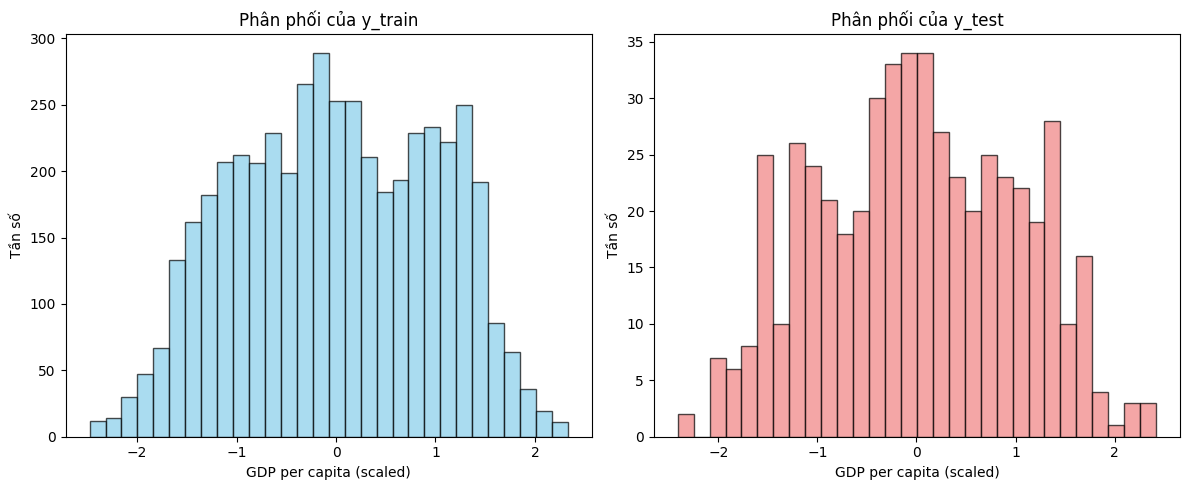

Thống kê y_train:
  - Mean: -0.000
  - Std: 0.999
  - Min: -2.479
  - Max: 2.332

Thống kê y_test:
  - Mean: 0.001
  - Std: 1.007
  - Min: -2.410
  - Max: 2.419


In [18]:
print("KIỂM TRA PHÂN PHỐI CỦA TARGET VARIABLE")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Biểu đồ phân phối của y_train
axes[0].hist(y_train, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Phân phối của y_train')
axes[0].set_xlabel('GDP per capita (scaled)')
axes[0].set_ylabel('Tần số')

# Biểu đồ phân phối của y_test
axes[1].hist(y_test, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1].set_title('Phân phối của y_test')
axes[1].set_xlabel('GDP per capita (scaled)')
axes[1].set_ylabel('Tần số')

plt.tight_layout()
plt.show()

print(f"Thống kê y_train:")
print(f"  - Mean: {y_train.mean():.3f}")
print(f"  - Std: {y_train.std():.3f}")
print(f"  - Min: {y_train.min():.3f}")
print(f"  - Max: {y_train.max():.3f}")

print(f"\nThống kê y_test:")
print(f"  - Mean: {y_test.mean():.3f}")
print(f"  - Std: {y_test.std():.3f}")
print(f"  - Min: {y_test.min():.3f}")
print(f"  - Max: {y_test.max():.3f}")

## Lưu dữ liệu thành 2 file riêng biệt cho train và test

In [19]:
print("LƯU DỮ LIỆU THÀNH 2 FILE RIÊNG BIỆT")

# Tạo DataFrame cho tập train
train_data = pd.DataFrame({
    'Country Name': df_clean.loc[X_train.index, 'Country Name'],
    'Country Code': df_clean.loc[X_train.index, 'Country Code'],
    'Year': df_clean.loc[X_train.index, 'Year']
})

# Thêm các features và target cho tập train
for col in feature_columns:
    train_data[col] = df_clean.loc[X_train.index, col]
train_data[target_column] = y_train

# Tạo DataFrame cho tập test
test_data = pd.DataFrame({
    'Country Name': df_clean.loc[X_test.index, 'Country Name'],
    'Country Code': df_clean.loc[X_test.index, 'Country Code'],
    'Year': df_clean.loc[X_test.index, 'Year']
})

# Thêm các features và target cho tập test
for col in feature_columns:
    test_data[col] = df_clean.loc[X_test.index, col]
test_data[target_column] = y_test

print(f"Kích thước tập train: {train_data.shape}")
print(f"Kích thước tập test: {test_data.shape}")

# Lưu thành 2 file CSV riêng biệt
train_data.to_csv('../data/train_data.csv', index=False)
test_data.to_csv('../data/test_data.csv', index=False)

print("Đã lưu dữ liệu thành 2 file:")
print("  - Tập train: '../data/train_data.csv'")
print("  - Tập test: '../data/test_data.csv'")

# Hiển thị thông tin về 2 file
print(f"\nTHÔNG TIN VỀ 2 FILE:")
print(f"Tập train: {len(train_data)} mẫu ({len(train_data)/len(df_clean)*100:.1f}%)")
print(f"Tập test: {len(test_data)} mẫu ({len(test_data)/len(df_clean)*100:.1f}%)")

print("\n5 DÒNG ĐẦU CỦA TẬP TRAIN:")
print(train_data.head())

print("\n5 DÒNG ĐẦU CỦA TẬP TEST:")
print(test_data.head())

print("\nHOÀN TẤT QUÁ TRÌNH TIỀN XỬ LÝ DỮ LIỆU!")
print("Dữ liệu đã được chia thành 2 file riêng biệt và sẵn sàng cho việc xây dựng mô hình Machine Learning.")

LƯU DỮ LIỆU THÀNH 2 FILE RIÊNG BIỆT
Kích thước tập train: (4691, 15)
Kích thước tập test: (522, 15)
Đã lưu dữ liệu thành 2 file:
  - Tập train: '../data/train_data.csv'
  - Tập test: '../data/test_data.csv'

THÔNG TIN VỀ 2 FILE:
Tập train: 4691 mẫu (90.0%)
Tập test: 522 mẫu (10.0%)

5 DÒNG ĐẦU CỦA TẬP TRAIN:
     Country Name Country Code  Year  \
3363   Mozambique          MOZ  2013   
2109      Croatia          HRV  2009   
435    Bangladesh          BGD  2010   
4835  Timor-Leste          TLS  2010   
3219         Mali          MLI  2019   

      Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)_scaled  \
3363                                                NaN                            
2109                                           0.010537                            
435                                            0.264489                            
4835                                                NaN                            
3219                         